# Punto 1

El agente es el jugador que decide si moverse a la izquierda o a la derecha en cada momento <br/>

Los estados son las 100 casillas en las que el agente puede encontrarse. No depende de información pasada, solo la casilla actual en que se encuentra<br/>

La probabilidad de transición es 1/6 para casillas que se encuentren a una distancia entre 1 y 6 de la casilla actual. En caso que la casilla se encuentre cerca de un borde, esta probabilidad puede aumentar hasta 2/6 por el rebote dependiendo de qué tan cerca se encuentre del borde<br/>

$$P_{ss'}^{a}=1/6*\sum_{i=-6}^{-1}  s_{max(abs(t-i)-1,t-i)} | s_t=s , a_t=izquierda$$

$$P_{ss'}^{a}=1/6*\sum_{i=1}^{6} s_{min(t+i,2*|S|-(t+i)-1)} | s_t=s , a_t=derecha$$

$$P_{ss'}^{a}=0 | Otros \quad casos$$

El valor esperado de la recompensa es 1000 en caso que la siguiente casilla sea una casilla de ganar el juego, y -1000 en caso que la siguiente casilla sea una casilla de perder el juego. En el resto de casos es 0 <br/>

$$R_{ss'}^{a}= val(s_{t+1}) | abs(val(s_{t+1}))=1000$$

$$R_{ss'}^{a}=0 | Otros \quad casos$$

Donde val es la función que indica el valor que tiene la casilla s (los números en la casilla)

# Punto 2

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [31]:
#Leer el archivo con los datos y cargarlos en las variables
cells=[]
with open('./data/m4.csv') as f:
    for line in f:
        cells.append(int(line))
print(cells)

[0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61, 0, -1000, 0, 0, 0, 0, 0, 0, 0, 0, -1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, -22, -1000, -41, 0, -39, 0, 41, 0, -41, 0, 41, -48, 0, 0, 0, -42, 0, 0, 34, -1000, -32, 0, 21, 0, 0, -33, 0, -1000, 0, -72, 0, 0, 0, 0, 0, 0, 1000, 0, 0, -64, 0, 0, -1000, 0, 0, 0, 0, 0, -41, 0, 0, -71, 0, 0, -70, 0, 1000]


Se encontrará una política óptima utilizando Iteración de valor. Se utilizará un factor de descuento de 0.9. Se utilizará un delta de 0.00001

In [32]:
def calcVsInit():
    vs=np.zeros(len(cells))
    for i in range(len(cells)):
        if abs(cells[i])==1000:
            vs[i]=cells[i]
    #print(vs)
    return vs

In [33]:
vs=calcVsInit()
d=1
diceProbability=1/6
discountFactor=0.9
while d>0.00001:
    d=0
    for i in range(len(vs)):
        if abs(vs[i])==1000:
            continue
        v=vs[i]
        if abs(cells[i])!=1000 and cells[i]!=0:
            updateValue=vs[i+cells[i]]
            vs[i]=updateValue
            d=max(d,abs(updateValue-v))
            continue
        valueOfRight=0
        for j in range(1,7):
            newPosition=i+j
            if newPosition>len(vs)-1:
                newPosition=2*len(vs)-newPosition-1
            if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
                valueOfRight+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]])
            else:
                valueOfRight+=diceProbability*(discountFactor*vs[newPosition])
        valueOfLeft=0
        for j in range(1,7):
            newPosition=i-j
            if newPosition<0:
                newPosition=abs(i-j)-1
            if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
                valueOfLeft+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]])
            else:
                valueOfLeft+=diceProbability*(discountFactor*vs[newPosition])
        updateValue=max(valueOfLeft,valueOfRight)
        vs[i]=updateValue
        d=max(d,abs(updateValue-v))

pi=np.zeros(len(vs))

for i in range(len(vs)):
    if abs(vs[i])==1000:
        continue
    valueOfRight=0
    for j in range(1,7):
        newPosition=i+j
        if newPosition>len(vs)-1:
            newPosition=2*len(vs)-newPosition-1
        if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
            valueOfRight+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]])
        else:
            valueOfRight+=diceProbability*(discountFactor*vs[newPosition])
    valueOfLeft=0
    for j in range(1,7):
        newPosition=i-j
        if newPosition<0:
            newPosition=abs(i-j)-1
        if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
            valueOfLeft+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]])
        else:
            valueOfLeft+=diceProbability*(discountFactor*vs[newPosition])
    if(valueOfLeft>valueOfRight):
        pi[i]=-1
    else:
        pi[i]=1
print(pi)

[ 1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1.  0.  1.  1.  1.  1.
 -1.  1. -1. -1. -1. -1.  0.  1.  0.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  0. -1. -1. -1. -1. -1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]


La política óptima se observa en el output de arriba. Los 1 indican que se debe mover a la derecha, los -1 indican que se debe mover a la izquierda. 0 en caso que el estado sea un estado terminal, por lo que no tiene sentido moverse a partir de aquí

# Punto 3

El error se calculará como la diferencia entre las funciones de valor del estado encontrada anteriormente contra el que se encontrará con Q learning. Esto se realizará así porque no necesariamente las acciones tienen que ser iguales teniendo en cuenta que una política es deterministica y otra es estocástica. En cambio, las funciones de valor deben poder indicar en qué tan buena posición se encuentra cada estado, lo cual en ambos casos debe ser similar. Se iterará 500000 veces, y se escogerá la política con menor error respecto a la política deterministica en cuanto a sus funciones de valor

Política óptima encontrada con Q learning
[[0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.7 0.3]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.3 0.7]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.5 0.5]
 [0.7 0.3]
 [0.5 0.5]
 [0.5 0.5]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.7 0.3]
 [0.5 0.5]
 [0.3 0.7]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.5 0.5]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.3 0.7]
 

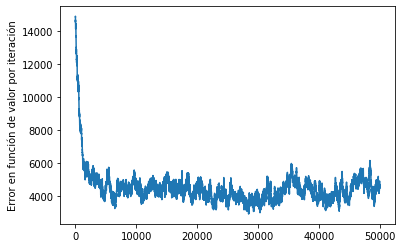

Índice de la política con menor error respecto a la deterministica
28451


In [42]:
vs2=calcVsInit()
qs2=np.zeros((len(cells),2))
pi2=np.full((len(cells),2),0.5)
alpha=0.1
discountFactor=0.9
epsilon=0.6
numIter=50000
errors=[]
pis=[]
for i in range(numIter):
    s=0
    while True:
        randomValue=random.random()
        if randomValue<pi2[s][0]:
            curA=0
        else:
            curA=1
        j=int((curA-0.5)*2*random.randrange(1, 7))
        newS=int(s+j)
        if newS>len(cells)-1:
            newS=2*len(cells)-newS-1
        if newS<0:
            newS=abs(newS)-1
        if abs(cells[newS])!=1000 and cells[newS]!=0:
            qs2[newS]= qs2[newS+cells[newS]]
            vs2[newS]= vs2[newS+cells[newS]]
            newS+=cells[newS]
        reward=0
        if abs(cells[newS])==1000:
            reward=cells[newS]
        maxA=max(qs2[newS][0],qs2[newS][1])
        qs2[s][curA]= qs2[s][curA] + alpha*(reward + discountFactor*maxA - qs2[s][curA])
        vs2[s]=qs2[s][0]*pi2[s][0]+qs2[s][1]*pi2[s][1]
        if abs(cells[newS])==1000:
            break
        a=np.argmax(qs2[s])
        pi2[s][a]=1-epsilon+epsilon/len(qs2[s])
        pi2[s][1-a]=epsilon/len(qs2[s])
        s=newS
    errorsT=0
    for j in range(len(pi2)):
        if cells[j]==0:
            #if pi[j]*(pi2[j][1]-0.5)<0:
                #errorsT+=1
            errorsT+=abs(vs[j]-vs2[j])
    errors.append(errorsT)
    pis.append(pi2)    
#print(qs2)
print("Política óptima encontrada con Q learning")
print(pi2)
#print(list(map(lambda x: ('{:.7f}'.format(x)) , vs2)))
plt.plot(errors)
plt.ylabel('Error en función de valor por iteración')
plt.show()
minErrorsIndex=np.argmin(errors)
print("Índice de la política con menor error respecto a la deterministica")
print(minErrorsIndex)

# Punto 4

Para estimar la probabilidad de ganar se guardará la cadena de celdas por donde avanza, esto se guardará como un set para no tener cadenas repetidas. Al terminar un episodio se recorre esta cadena y se almacena en una matriz si esto resultó en ganar o perder. Por tanto, para la celda 0 se tendrá la cantidad total de veces que ganó y que perdió comenzando con esta política.

Por otra parte, para calcular la duración de un episodio se guardará en otro arreglo la cantidad de veces que pasa por el ciclo interno antes de salir ya sea ganando o perdiendo, esto se hará para todos los episodios. El resultado será el promedio de estos valores

In [43]:
bestPi=pis[minErrorsIndex]
wins=np.zeros((len(cells),2))
durations=[]
for i in range(100000):
    s=0
    chain={0}
    hasWon=False
    durationT=0
    while True:
        durationT+=1
        randomValue=random.random()
        if randomValue<bestPi[s][0]:
            curA=0
        else:
            curA=1
        j=int((curA-0.5)*2*random.randrange(1, 7))
        newS=int(s+j)
        if newS>len(cells)-1:
            newS=2*len(cells)-newS-1
        if newS<0:
            newS=abs(newS)-1
        if abs(cells[newS])!=1000 and cells[newS]!=0:
            qs2[newS]= qs2[newS+cells[newS]]
            vs2[newS]= vs2[newS+cells[newS]]
            newS+=cells[newS]
        if abs(cells[newS])==1000:
            #print(durationT)
            #print("estado actual")
            #print(newS)
            if cells[newS]==1000:
                hasWon=True
            break
        s=newS
        chain.add(s)
    durations.append(durationT)
    while len(chain)>0:
        cell=chain.pop()
        if hasWon:
            wins[cell][0]+=1
        else:
            wins[cell][1]+=1
#print(cells)
#print(wins) 
print("Probabilidad de ganar")
print(wins[0][0]/(wins[0][0]+wins[0][1]))
print("Duración promedio")
print(sum(durations) / len(durations))

Probabilidad de ganar
0.28379
Duración promedio
21.20165


Como se puede observar, la probabilidad de ganar de un episodio es bastante baja, de aproximadamente 0.283. De acuerdo a la política, el agente intenta llegar al salto en la celda 21, donde termina en la celda 82, y de allí intenta ganar con la celda 80. Sin embargo, puede caer en la celda 8 en la que queda atrapado entre 2 celdas de pérdida o en la 23, donde pierde directamente.

Por otra parte, la duración promedio de un episodio es bastante alta, aproximadamente de 21.2 iteraciones.